In [2]:
'''

    ESEMPIO di SNIP
    nota: per semplicità della dimostrazione, non viene rimosso il fondo del cristallo.

'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


def SNIP_algorithm(spectrum, iterations=20):
    
    '''
    
    Algoritmo SNIP per la rimozione del fondo da uno spettro gamma.
    Lo spettro in input deve essere un array di conteggi/frequenze.
    
    Args:
    - spectrum: array di conteggi/frequenze
    - iterations: numero di iterazioni dell'algoritmo (default=20)
    
    Returns:
    - array di conteggi/frequenze di fondo dello spettro in input
    
    '''
    
    # fase 1: trasformo ogni canale i-esimo in un doppio logaritmo della radice quadrata
    spectrum_log = np.log(np.log(np.sqrt(spectrum + 1) + 1) + 1)
    
    # allungo l'array per evitare problemi di bordo durante la fase 2
    n_added = iterations
    begin_list = np.ones(n_added) * spectrum_log[0]
    end_list = np.ones(n_added) * spectrum_log[-1]
    spectrum_log = np.concatenate((begin_list, spectrum_log, end_list))
    
    # fase 2: applico l'algoritmo iterativo
    for k in range(1, iterations+1, 1):
        for i in range(len(spectrum_log[n_added:-n_added])):
            spectrum_log[i] = np.minimum(spectrum_log[i], 0.5 * (spectrum_log[i+k] + spectrum_log[i-k]))
            
    # fase 3: antitrasformo e restituisco il risultato 
    return (np.exp(np.exp(spectrum_log[n_added:-n_added])-1)-1)**2-1

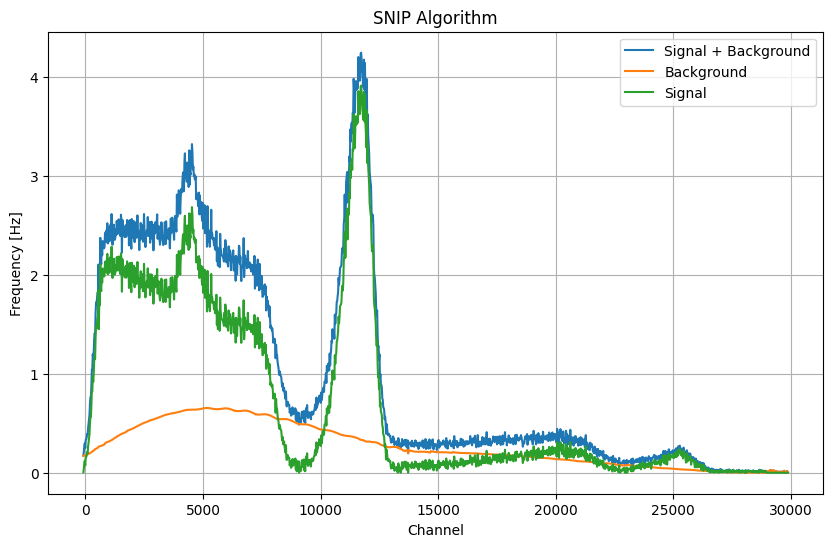

In [12]:
# esempio pratico

# 1. importo i dati e normalizzo
segnale = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Spettrometria Gamma\CsI\Alluminio\0cm.csv', sep=' \t', engine='python')
channel = np.array(segnale['Channel'])[0:1500]
counts = np.array(segnale['Counts'])[0:1500]
time_signal = 300 #s


N = 47
frequency_and_background = counts/time_signal
background = SNIP_algorithm(frequency_and_background, iterations=N)

frequency = frequency_and_background - background

# 2. plotto i risultati
plt.figure(figsize=(10,6))
plt.plot(channel, frequency_and_background, label='Signal + Background')
plt.plot(channel, background, label='Background')
plt.plot(channel, frequency, label='Signal')
plt.xlabel('Channel')
plt.ylabel('Frequency [Hz]')
plt.title('SNIP Algorithm')
plt.legend()
plt.grid()
plt.show()